In [40]:
import numpy as np
from matplotlib import pyplot as plt

# Zadanie 2.

Rozwiązaniem dokładnym zagadnienia brzegowego

$$\begin{cases}
-y''\left(x\right)+\left(x+2\right)y\left(x\right)=-\pi^2\sin\left(\pi x\right)+\left(x+2\right)\left(x-\sin\left(\pi x\right)\right), \quad x\in\left(0,1\right)\\ \\
y\left(0\right)=0,\,\,y\left(1\right)=1
\end{cases}$$

jest funkcja $y\left(x\right)=x−\sin\left(\pi x\right)$. Znajdź przybliżone rozwiązanie tego zagadnienia metodą wstrzeliwania. Pomocnicze zagadnienie początkowe rozwiąż za pomoca metody Rungego-Kutty drugiego rzędu. Sporządź wykresy rozwiązania dokładnego i rozwiązania przybliżonego. Wyznacz błąd aproksymacji.

## Metoda wstrzeliwania

Wprowadzono pomocnicze zagadnienie początkowe:
$$
\begin{cases}
-y''\left(x\right)=-\left(x+2\right)y\left(x\right)-\pi^2\sin\left(\pi x\right)+\left(x+2\right)\left(x-\sin\left(\pi x\right)\right), \quad x\in\left(0,1\right)\\\\
y\left(0;s\right)=0,\\\\
y'\left(0;s\right)=s,
\end{cases}
$$

gdzie $s$ jest parametrem. Zapisano powyższy układ równań stosując podstawienie $y'\left(x\right)=v\left(x\right).$

$$
\begin{cases}
y'\left(x\right)=v\left(x\right) & y\left(0;s\right)=0,\\\\
v'\left(x\right)=\left(x+2\right)y\left(x\right)+\pi^2\sin\left(\pi x\right)-\left(x+2\right)\left(x-\sin\left(\pi x\right)\right), & v\left(0;s\right)=s,
\end{cases}
$$


Zdefiniowano $\Phi\left(s\right):=y\left(1;s\right)$ spełniające powyższy układ równań.

## Metoda Rungego-Kutty

Schemat Rungego-Kutty drugiego rzędu wygląda następująco:

$$
\begin{cases}
k_1 = f\left(x_n, y_n\right)h,\\\\
k_2 = f\left(x_n+h, y_n+k_1\right)h,\\\\
y_{n+1}=y_n+\frac{1}{2}\left(k_1+k_2\right),
\end{cases}
$$
gdzie $y'=f, h=\frac{b-a}{N}.$

Zaczęto od zastosowania schematu dla 
$$
v'\left(x\right)=\left(x+2\right)y\left(x\right)+\pi^2\sin\left(\pi x\right)-\left(x+2\right)\left(x-\sin\left(\pi x\right)\right), \quad v\left(0;s\right)=s
$$

Funkcją $f$ w tym rówaniu jest 
$$
f\left(x,y,v\right)= f\left(x,y\right) = \left(x+2\right)y+\pi^2\sin\left(\pi x\right)-\left(x+2\right)\left(x-\sin\left(\pi x\right)\right).
$$

In [41]:
def f1(x,y):
    return (x+2)*y+np.pi**2*np.sin(np.pi*x)-(x+2)*(x-np.sin(np.pi*x))

Skonstruowano schemat Rungego-Kutty jako:

$$
\begin{cases}
k_{v1} = f\left(x_n, y_n\right)h,\\\\
k_{v2} = f\left(x_n+h, y_n+k_{v1}\right)h,\\\\
v_{n+1}=v_n+\frac{1}{2}\left(k_{v1}+k_{v2}\right),
\end{cases}
$$

Następnie podobnie wyznaczono schemat dla rówania 

$$
y'\left(x\right)=v\left(x\right), \quad y\left(0;s\right)=0,
$$

gdzie szukaną funkcją jest $f_2=y'=v$. Otrzymano:

$$
\begin{cases}
k_{y1} = f_2\left(x_n,v(x_n)\right)h,\\\\
k_{y2} = f_2\left(x_n+h,v(x_n)+k_{y1}\right)h,\\\\
y_{n+1}= y_n+\frac{1}{2}\left(k_{y1}+k_{y2}\right),
\end{cases}
$$

Jako, że z poprzedniego schemtu wyznaczono wektor watorści $v$ odpowiadających wartościom $x$ można powyższy schemat zapisać następująco

$$
\begin{cases}
k_{y1} = v_nh,\\\\
k_{y2} = (v_{n}+k_{y1})h,\\\\
y_{n+1}= y_n+\frac{1}{2}\left(k_{y1}+k_{y2}\right),
\end{cases}
$$

Jako, że $f_2(x,v)=v$ to $f_2(x+h,v+k_{y1})=v+k_{y1}$

In [42]:
def rungego_kutty(a,b,y0,s,N,func):
    h = (b-a)/N
    x = np.array([a+i*h for i in range(N+1)])
    v = [s]
    y = [y0]
    for i in range(N):
        k_v1 = func(x[i],y[i])*h
        k_v2 = func(x[i]+h,y[i]+k_v1)*h
        v.append(v[i]+0.5*(k_v1+k_v2))

        k_y1 = v[i]*h
        k_y2 = (v[i]+k_y1)*h
        y.append(y[i]+0.5*(k_y1+k_y2))
    phi = y[N]
    return y,phi

Przyjęto, że $\Phi_h\left(s\right):=y_N\approx y\left(1;s\right)$, co potraktowano jako przybliżenie $\Phi_h\left(s\right)\approx\Phi\left(s\right)$.

## Metoda bisekcji

(sprawdzamy kiedy najbliżej do y(1;s)=1)

Szukamy $s_1$ i $s_2$ takich, że $\Phi_h\left(s_1\right)<1<\Phi_h\left(s_2\right).$ Sprawdzono $s_1=-5, s_2=5.$

In [43]:
s_1 = rungego_kutty(0,1,0,-5,1000,f1)[1]
s_2 = rungego_kutty(0,1,0,5,1000,f1)[1]
print(s_1,s_2)

-3.2061801539678374 11.510568945580266


In [44]:
s = np.arange(-10,10,0.1)
phi = [rungego_kutty(0,1,0,i,1000,f1)[1] for i in s]

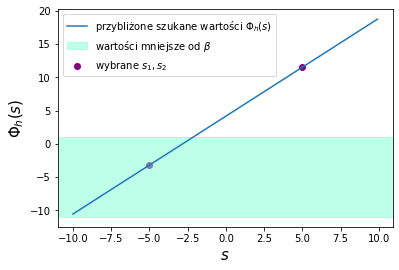

In [45]:
plt.plot(s,phi, label='przybliżone szukane wartości $\Phi_h(s)$')
plt.axhspan(-11, 1, color='aquamarine', 
            label='wartości mniejsze od $\\beta$', alpha=0.5)
plt.scatter([-5,5],[s_1,s_2], color='purple', label='wybrane $s_1,s_2$')
plt.xlabel('$s$', size=15)
plt.ylabel('$\Phi_h(s)$', size=15)
plt.legend()
plt.show()

In [46]:
def bis(a,b,N,func,y0,yb,s1,s2):
    phi = yb+10
    while abs(phi-yb) > 10**(-5):
        s = (s1+s2)/2
        phi = rungego_kutty(a,b,y0,s,N,func)[1]
        if phi < yb:
            s1 = s
        elif phi>yb:
            s2 = s
    return s

In [47]:
a = 0
b = 1
y0 = 0
yb = 1

Dla $N\in\left\{10,100,1000,10000\right\}$

### Przybliżenie przy $N=10.$

In [48]:
N1 = 10
h1 = (b-a)/N1
xi1 = np.array([a+i*h1 for i in range(N1+1)])
s1 = bis(a,b,N1,f1,y0,yb,-5,5)
yi1 = rungego_kutty(a,b,y0,s1,N1,f1)[0]
y_exact1 = xi1-np.sin(np.pi*xi1)

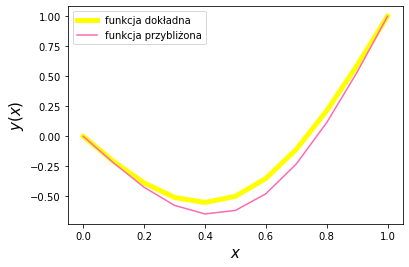

In [49]:
plt.plot(xi1,y_exact1, color='yellow', linewidth=5, label='funkcja dokładna')
plt.plot(xi1,yi1, color='hotpink', label='funkcja przybliżona')
plt.xlabel('$x$', size=15)
plt.ylabel('$y(x)$', size=15)
plt.legend()
plt.show()

### Błąd aproksymacji przy $N=10.$

In [50]:
max(abs(y_exact1-yi1))

0.1278566645436891

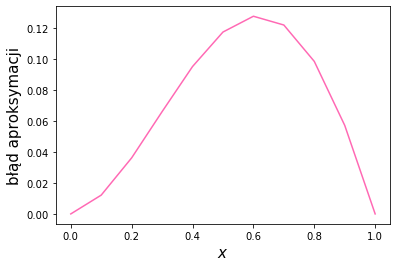

In [51]:
bld1 = abs(y_exact1-yi1)
plt.plot(xi1,bld1, color='hotpink')
plt.xlabel('$x$', size=15)
plt.ylabel('błąd aproksymacji', size=15)
plt.show()

### Przybliżenie przy $N=100.$

In [52]:
N2 = 100
h2 = (b-a)/N2
xi2 = np.array([a+i*h2 for i in range(N2+1)])
s2 = bis(a,b,N2,f1,y0,yb,-5,5)
yi2 = rungego_kutty(a,b,y0,s2,N2,f1)[0]
y_exact2 = xi2-np.sin(np.pi*xi2)

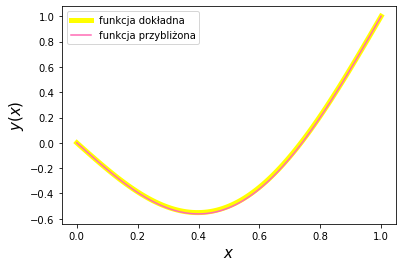

In [53]:
plt.plot(xi2,y_exact2, color='yellow', linewidth=5, label='funkcja dokładna')
plt.plot(xi2,yi2, color='hotpink', label='funkcja przybliżona')
plt.xlabel('$x$', size=15)
plt.ylabel('$y(x)$', size=15)
plt.legend()
plt.show()

### Błąd aproksymacji przy $N=100.$

In [54]:
max(abs(y_exact2-yi2))

0.013142726800924098

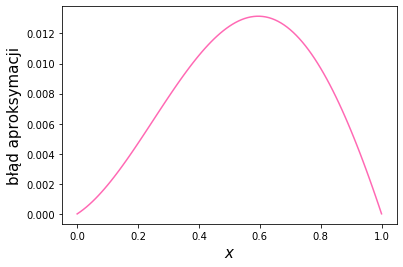

In [55]:
bld2 = abs(y_exact2-yi2)
plt.plot(xi2,bld2, color='hotpink')
plt.xlabel('$x$', size=15)
plt.ylabel('błąd aproksymacji', size=15)
plt.show()

### Przybliżenie przy $N=1000.$

In [56]:
N3 = 1000
h3 = (b-a)/N3
xi3 = np.array([a+i*h3 for i in range(N3+1)])
s3 = bis(a,b,N3,f1,y0,yb,-5,5)
yi3 = rungego_kutty(a,b,y0,s3,N3,f1)[0]
y_exact3 = xi3-np.sin(np.pi*xi3)

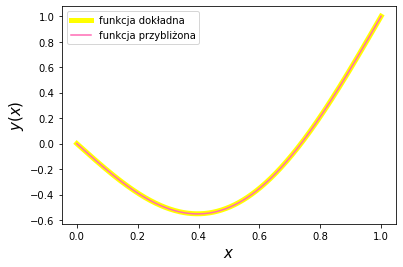

In [57]:
plt.plot(xi3,y_exact3, color='yellow', linewidth=5, label='funkcja dokładna')
plt.plot(xi3,yi3, color='hotpink', label='funkcja przybliżona')
plt.xlabel('$x$', size=15)
plt.ylabel('$y(x)$', size=15)
plt.legend()
plt.show()

### Błąd aproksymacji przy $N=1000.$

In [58]:
max(abs(y_exact3-yi3))

0.001319122581023957

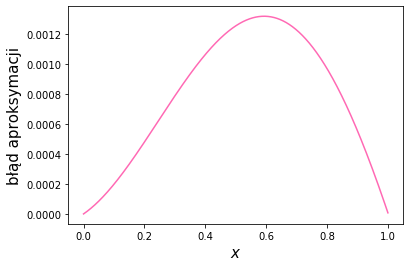

In [59]:
bld3 = abs(y_exact3-yi3)
plt.plot(xi3,bld3, color='hotpink')
plt.xlabel('$x$', size=15)
plt.ylabel('błąd aproksymacji', size=15)
plt.show()

### Przybliżenie przy $N=10000.$

In [60]:
N4 = 10000
h4 = (b-a)/N4
xi4 = np.array([a+i*h4 for i in range(N4+1)])
s4 = bis(a,b,N4,f1,y0,yb,-5,5)
yi4 = rungego_kutty(a,b,y0,s4,N4,f1)[0]
y_exact4 = xi4-np.sin(np.pi*xi4)

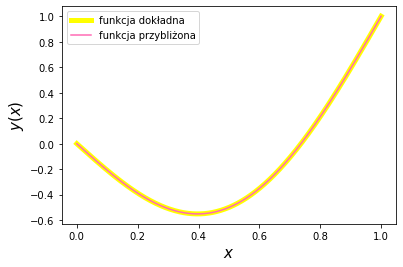

In [61]:
plt.plot(xi4,y_exact4, color='yellow', linewidth=5, label='funkcja dokładna')
plt.plot(xi4,yi4, color='hotpink', label='funkcja przybliżona')
plt.xlabel('$x$', size=15)
plt.ylabel('$y(x)$', size=15)
plt.legend()
plt.show()

### Błąd aproksymacji przy $N=10000.$

In [62]:
max(abs(y_exact4-yi4))

0.0001338386972031258

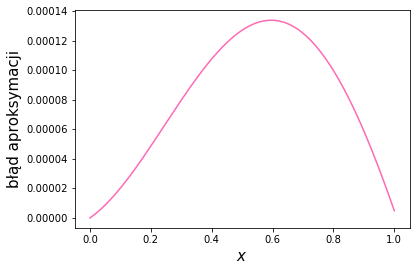

In [63]:
bld4 = abs(y_exact4-yi4)
plt.plot(xi4,bld4, color='hotpink')
plt.xlabel('$x$', size=15)
plt.ylabel('błąd aproksymacji', size=15)
plt.show()

### Porównanie przybliżenia dla różnych $N.$

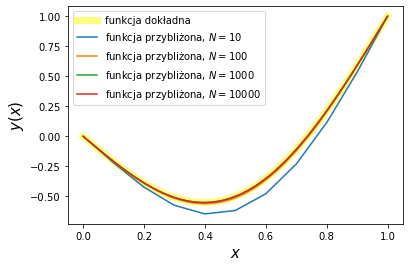

In [64]:
plt.plot(xi4,y_exact4, color='yellow', alpha=0.5, linewidth=7, label='funkcja dokładna')
plt.plot(xi1,yi1, label='funkcja przybliżona, $N=10$')
plt.plot(xi2,yi2, label='funkcja przybliżona, $N=100$')
plt.plot(xi3,yi3, label='funkcja przybliżona, $N=1000$')
plt.plot(xi4,yi4, label='funkcja przybliżona, $N=10000$')
plt.xlabel('$x$', size=15)
plt.ylabel('$y(x)$', size=15)
plt.legend()
plt.show()

### Porównanie błędów aproksymacji dla różnych $N.$

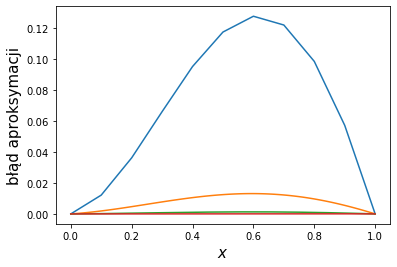

In [65]:
plt.plot(xi1,bld1, label='błąd przy $N=10$')
plt.plot(xi2,bld2, label='błąd przy $N=100$')
plt.plot(xi3,bld3, label='błąd przy $N=1000$')
plt.plot(xi4,bld4, label='błąd przy $N=10000$')
plt.xlabel('$x$', size=15)
plt.ylabel('błąd aproksymacji', size=15)
plt.show()

In [66]:
bld = []
for N in np.arange(50,1000,50):
    h = (b-a)/N
    xi = np.array([a+i*h for i in range(N+1)])
    sx = bis(a,b,N,f1,y0,yb,-5,5)
    yi = rungego_kutty(a,b,y0,sx,N,f1)[0]
    y_exact = xi-np.sin(np.pi*xi)
    bld.append(max(abs(y_exact-yi)))

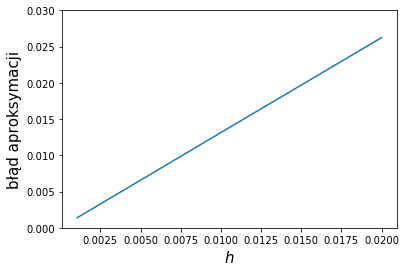

In [67]:
plt.plot((b-a)/np.arange(50,1000,50), bld)
plt.ylim([0,0.03])
plt.xlabel('$h$', size=15)
plt.ylabel('błąd aproksymacji', size=15)
plt.show()